<a href="https://colab.research.google.com/github/sebsnaranjo/MachineLearning/blob/main/Pr%C3%A1ctica_uso_de_redes_convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Integrantes:
Frank Sebastian Naranjo Castillo,
Ana Sofia Lopera Riveros

In [80]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.constraints import maxnorm
from keras.utils import np_utils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers
from keras.models import Sequential, model_from_json
from keras.layers.core import Dense
from sklearn.model_selection import train_test_split
from keras.optimizers import *
#Permisos para acceso de drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

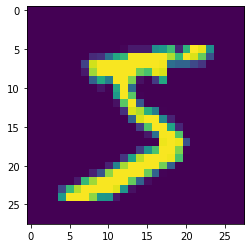

In [82]:
mgplot = plt.imshow(x_train[0])

In [83]:
# llevar los valores enteros a formato de punto flotante a 32 bits

x_train = x_train.astype('float32') 

x_test = x_test.astype('float32')

# Normalizar cada una de las entradas

x_train = x_train / 255.0

x_test = x_test / 255.0

In [84]:
# Convertir a one hot encoding

y_train = np_utils.to_categorical(y_train)

y_test = np_utils.to_categorical(y_test)

# Obtener el número de clases (10)

class_num = y_test.shape[1]

input_shape = (28, 28, 1)

In [85]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [86]:
input_dim = x_train.shape[1]

In [87]:
modelo = Sequential()

In [88]:
input_shape = (28, 28, 1)

In [89]:
modelo.add(keras.Input(shape=input_shape))

In [90]:
modelo.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))

In [91]:
modelo.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [92]:
modelo.add(layers.Flatten())

In [93]:
modelo.add( Dense(15, input_dim=input_dim, activation='relu'))
modelo.add( Dense(class_num, activation='softmax'))

In [94]:
modelo.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_7 (Dense)             (None, 15)                81135     
                                                                 
 dense_8 (Dense)             (None, 10)                160       
                                                                 
Total params: 81,615
Trainable params: 81,615
Non-trainable params: 0
__________________________________________________

In [95]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.2)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [96]:
epocas = 5
batch = 64

In [97]:
train_model=modelo.fit(x_train, y_train, batch_size=batch, validation_data=(x_test, y_test), epochs=epocas)

Epoch 1/5
938/938 [==============================] - 22s 23ms/step - loss: 0.2676 - accuracy: 0.9170 - val_loss: 0.0939 - val_accuracy: 0.9700
Epoch 2/5
938/938 [==============================] - 21s 23ms/step - loss: 0.0816 - accuracy: 0.9755 - val_loss: 0.0721 - val_accuracy: 0.9761
Epoch 3/5
938/938 [==============================] - 21s 23ms/step - loss: 0.0592 - accuracy: 0.9828 - val_loss: 0.0584 - val_accuracy: 0.9798
Epoch 4/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0473 - accuracy: 0.9859 - val_loss: 0.0529 - val_accuracy: 0.9832
Epoch 5/5
938/938 [==============================] - 21s 23ms/step - loss: 0.0397 - accuracy: 0.9879 - val_loss: 0.0502 - val_accuracy: 0.9840


Text(0.5, 0, 'Iteración')

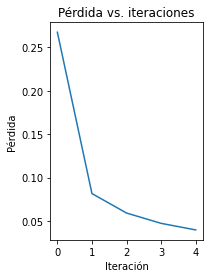

In [98]:
plt.subplot(1,2,1)
plt.plot(train_model.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

Text(0.5, 0, 'Iteración')

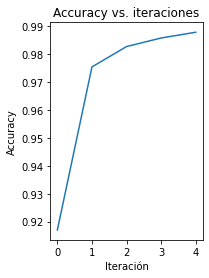

In [99]:
plt.subplot(1,2,1)
plt.plot(train_model.history['accuracy'])
plt.title('Accuracy vs. iteraciones')
plt.ylabel('Accuracy')
plt.xlabel('Iteración')

In [101]:
puntaje = modelo.evaluate(x_test,y_test,verbose=0)
print('Precisión en el set de validación: ', (puntaje[1]))

Precisión en el set de validación:  0.984000027179718
